In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HomeA-meter4_2016.csv', parse_dates=True, index_col=0)

# Assuming the first column is the timestamp and the rest are device usages,
# you can sum these usages to get total energy demand
df['Total Demand'] = df.sum(axis=1)

# Check the first few rows to verify everything looks correct
print(df.head())


                     use [kW]  gen [kW]  KitchenDenLights [kW]  \
Date & Time                                                      
2016-01-01 00:00:00       0.0       0.0               0.007658   
2016-01-01 00:15:00       0.0       0.0               0.007607   
2016-01-01 00:30:00       0.0       0.0               0.007591   
2016-01-01 00:45:00       0.0       0.0               0.007613   
2016-01-01 01:00:00       0.0       0.0               0.007593   

                     MasterBedBathLights [kW]  MasterOutlets [kW]  \
Date & Time                                                         
2016-01-01 00:00:00                  0.021299            0.021406   
2016-01-01 00:15:00                  0.004709            0.021479   
2016-01-01 00:30:00                  0.004656            0.020737   
2016-01-01 00:45:00                  0.004643            0.020870   
2016-01-01 01:00:00                  0.004641            0.020090   

                     DenOutdoorLights [kW]  DenOutlet

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502743 entries, 2016-01-01 00:00:00 to 2016-12-31 23:59:00
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   use [kW]                          502743 non-null  float64
 1   gen [kW]                          502743 non-null  float64
 2   KitchenDenLights [kW]             502743 non-null  float64
 3   MasterBedBathLights [kW]          502743 non-null  float64
 4   MasterOutlets [kW]                502743 non-null  float64
 5   DenOutdoorLights [kW]             502743 non-null  float64
 6   DenOutlets [kW]                   502743 non-null  float64
 7   RearBasementLights [kW]           502743 non-null  float64
 8   KitchenOutletsEast [kW]           502743 non-null  float64
 9   KitchenOutletsSouth [kW]          502743 non-null  float64
 10  DishwasherDisposalSinkLight [kW]  502743 non-null  float64
 11  Refrigerator [kW] 

In [3]:
# Convert index to datetime if it isn't already
df.index = pd.to_datetime(df.index)

# Resample data to hourly, taking the mean for each hour
df_hourly = df.resample('H').mean()

# Explicitly set the frequency of the resampled DataFrame's index
df_hourly.index.freq = 'H'

df_hourly.dropna(inplace_True)

# You can then check if resampling has filled all the gaps
print(df_hourly.head())

                     use [kW]  gen [kW]  KitchenDenLights [kW]  \
Date & Time                                                      
2016-01-01 00:00:00       0.0       0.0               0.007617   
2016-01-01 01:00:00       0.0       0.0               0.007612   
2016-01-01 02:00:00       0.0       0.0               0.007634   
2016-01-01 03:00:00       0.0       0.0               0.007634   
2016-01-01 04:00:00       0.0       0.0               0.007625   

                     MasterBedBathLights [kW]  MasterOutlets [kW]  \
Date & Time                                                         
2016-01-01 00:00:00                  0.008827            0.021123   
2016-01-01 01:00:00                  0.004985            0.015389   
2016-01-01 02:00:00                  0.005344            0.009302   
2016-01-01 03:00:00                  0.004668            0.008817   
2016-01-01 04:00:00                  0.004669            0.008579   

                     DenOutdoorLights [kW]  DenOutlet

In [6]:
df_hourly.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Freq: H
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   use [kW]                          8783 non-null   float64
 1   gen [kW]                          8783 non-null   float64
 2   KitchenDenLights [kW]             8783 non-null   float64
 3   MasterBedBathLights [kW]          8783 non-null   float64
 4   MasterOutlets [kW]                8783 non-null   float64
 5   DenOutdoorLights [kW]             8783 non-null   float64
 6   DenOutlets [kW]                   8783 non-null   float64
 7   RearBasementLights [kW]           8783 non-null   float64
 8   KitchenOutletsEast [kW]           8783 non-null   float64
 9   KitchenOutletsSouth [kW]          8783 non-null   float64
 10  DishwasherDisposalSinkLight [kW]  8783 non-null   float64
 11  Refrigerator [kW]        

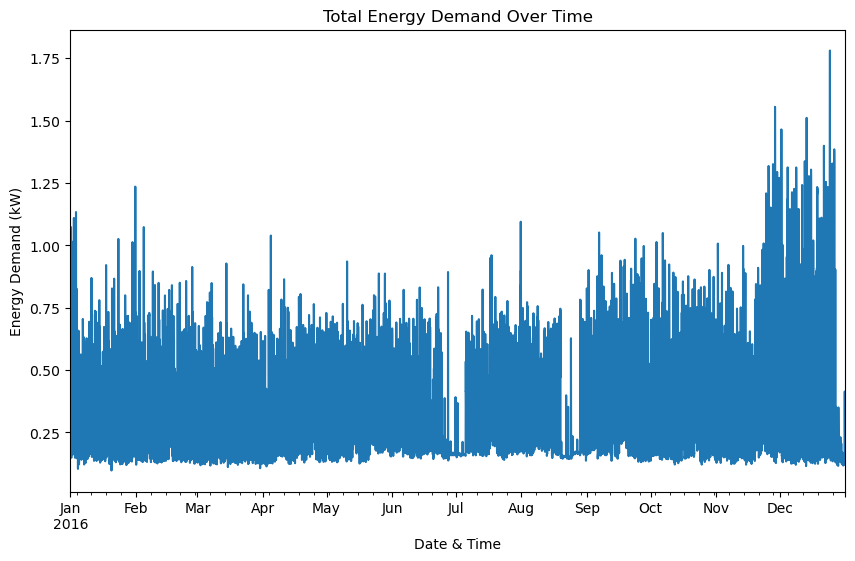

In [7]:
import matplotlib.pyplot as plt

# Plot the total energy demand
df_hourly['Total Demand'].plot(figsize=(10, 6))
plt.ylabel('Energy Demand (kW)')
plt.title('Total Energy Demand Over Time')
plt.show()


In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_hourly['Total Demand'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpretation
if result[1] > 0.05:
    print("The series is not stationary, consider differencing.")
else:
    print("The series is stationary.")


ADF Statistic: -7.894706
p-value: 0.000000
The series is stationary.


                               SARIMAX Results                                
Dep. Variable:           Total Demand   No. Observations:                 8784
Model:                 ARIMA(1, 0, 1)   Log Likelihood                3599.703
Date:                Fri, 16 Feb 2024   AIC                          -7191.406
Time:                        13:09:14   BIC                          -7163.083
Sample:                    01-01-2016   HQIC                         -7181.756
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3215      0.006     53.239      0.000       0.310       0.333
ar.L1          0.5203      0.011     49.447      0.000       0.500       0.541
ma.L1          0.2103      0.012     16.850      0.0

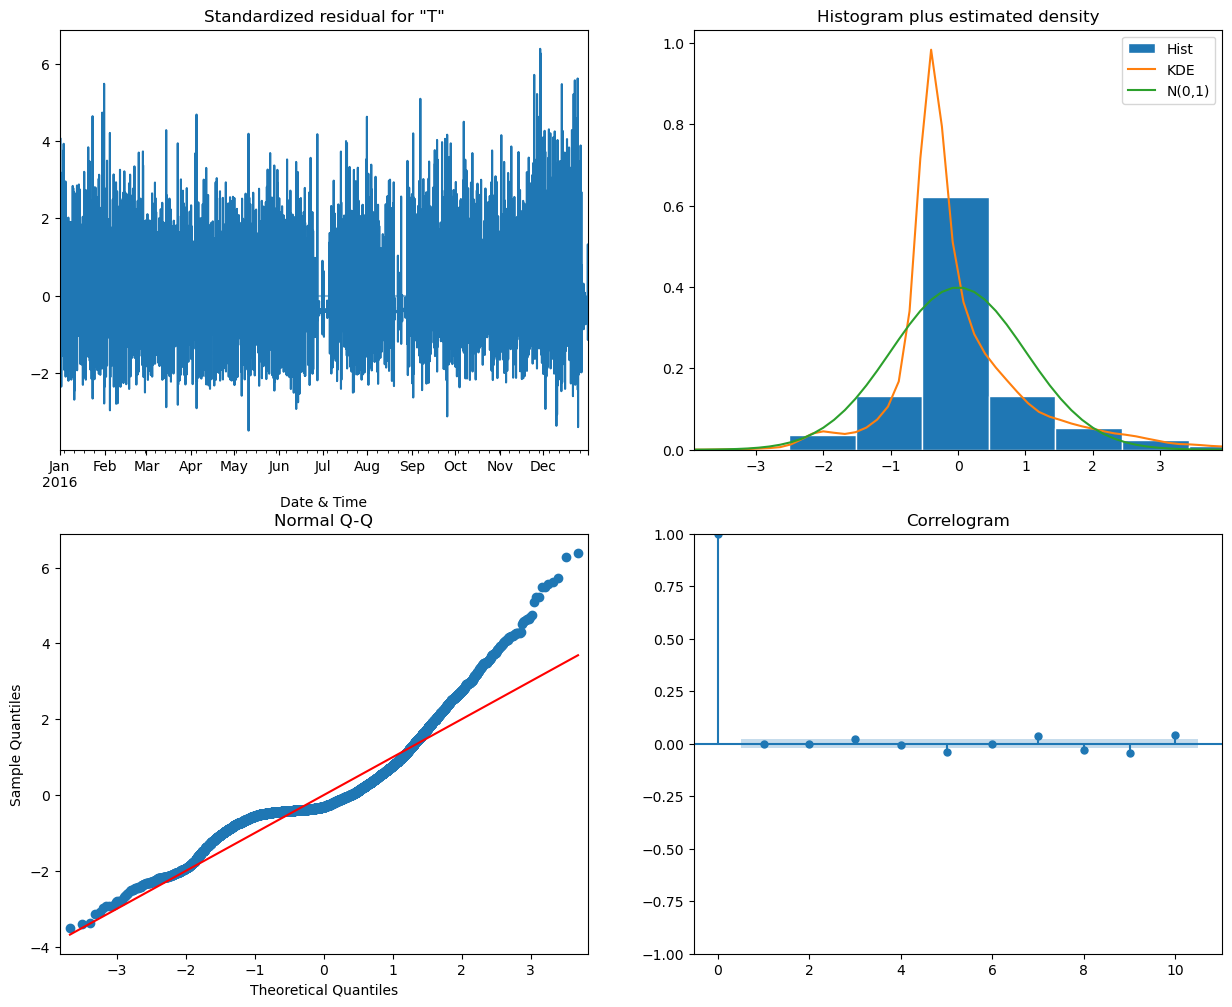

In [27]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming the series is stationary or you've differenced it to achieve stationarity
# Replace p, d, q with your chosen parameters
p, d, q = 1, 0, 1  
model = ARIMA(df_hourly['Total Demand'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

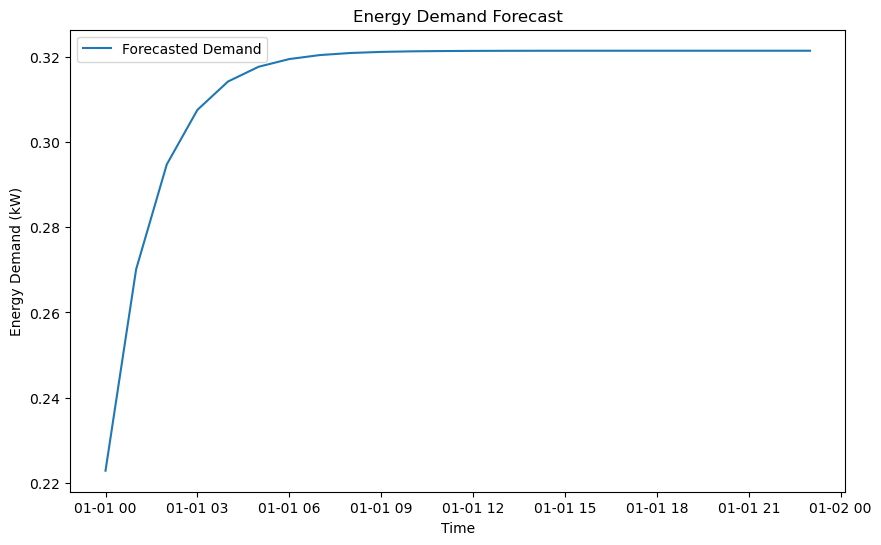

In [28]:
forecast = model_fit.forecast(steps=24)  # Example: Forecasting the next 24 hours

# Optional: Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(forecast, label='Forecasted Demand')
plt.title('Energy Demand Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Demand (kW)')
plt.legend()
plt.show()

In [22]:
# Resample data to weekly, taking the mean for each week
df_weekly = df.resample('W').mean()
# Explicitly set the index frequency to weekly
df_weekly.index.freq = 'W'
df_weekly.dropna(inplace=True)

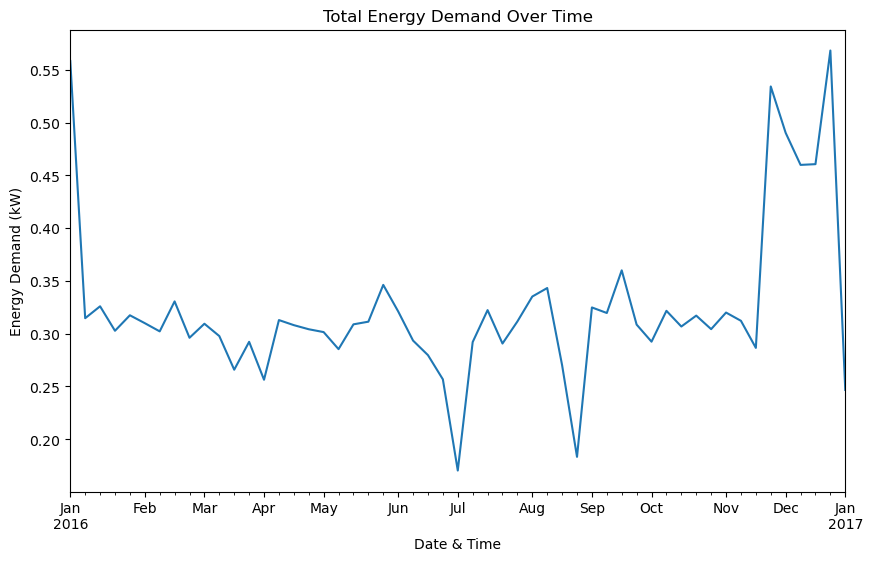

In [23]:
# Plot the total energy demand
df_weekly['Total Demand'].plot(figsize=(10, 6))
plt.ylabel('Energy Demand (kW)')
plt.title('Total Energy Demand Over Time')
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_weekly['Total Demand'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpretation
if result[1] > 0.05:
    print("The series is not stationary, consider differencing.")
else:
    print("The series is stationary.")


ADF Statistic: -5.214961
p-value: 0.000008
The series is stationary.


                               SARIMAX Results                                
Dep. Variable:           Total Demand   No. Observations:                   53
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  63.816
Date:                Fri, 16 Feb 2024   AIC                           -121.633
Time:                        13:11:41   BIC                           -115.779
Sample:                    01-03-2016   HQIC                          -119.388
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2379      0.268      0.887      0.375      -0.288       0.764
ma.L1         -0.8076      0.128     -6.315      0.000      -1.058      -0.557
sigma2         0.0050      0.001      7.106      0.0

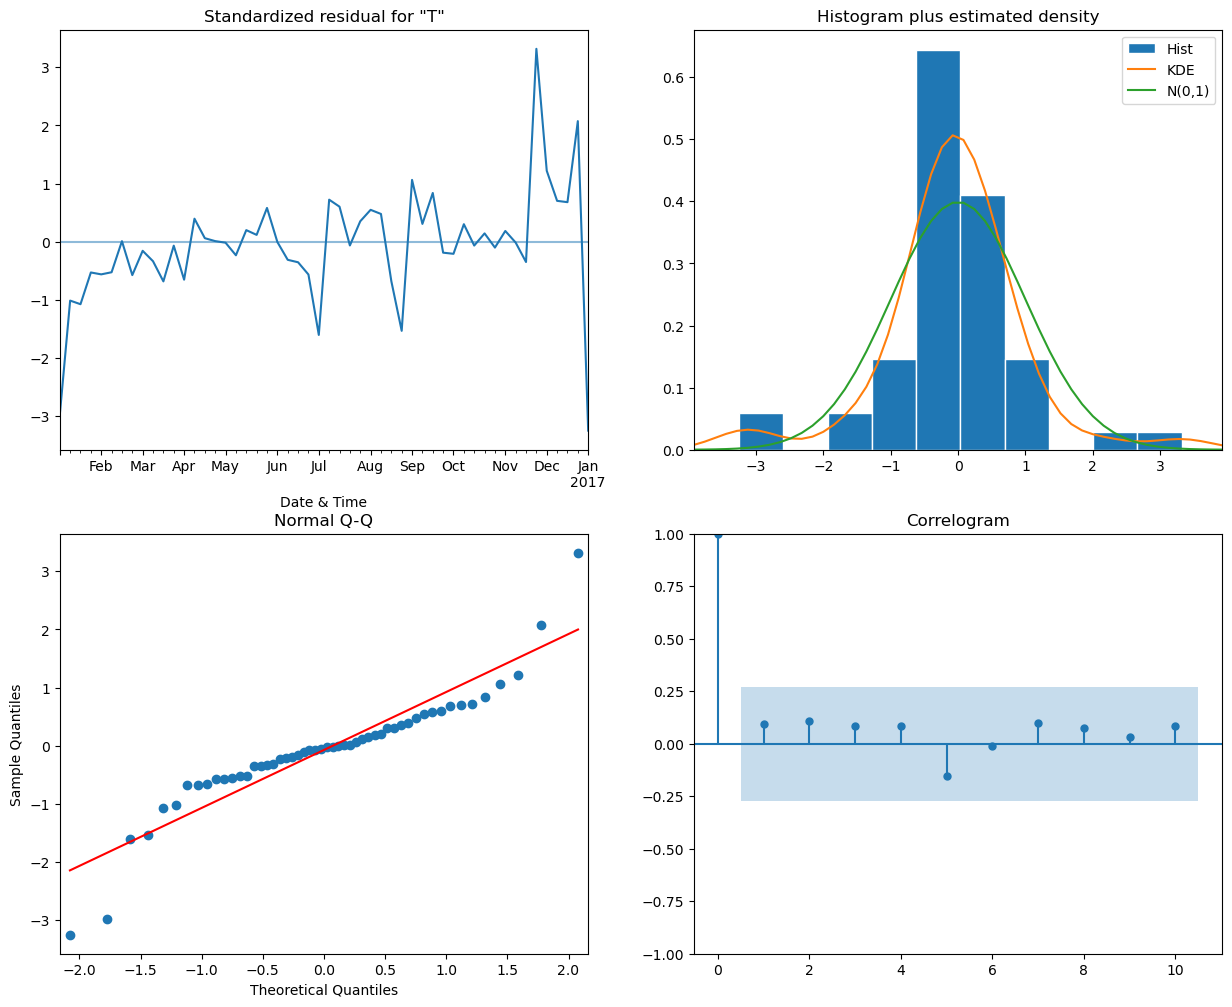

In [29]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming the series is stationary or you've differenced it to achieve stationarity
# Replace p, d, q with your chosen parameters
p, d, q = 1, 1, 1  # Example parameters
model = ARIMA(df_weekly['Total Demand'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

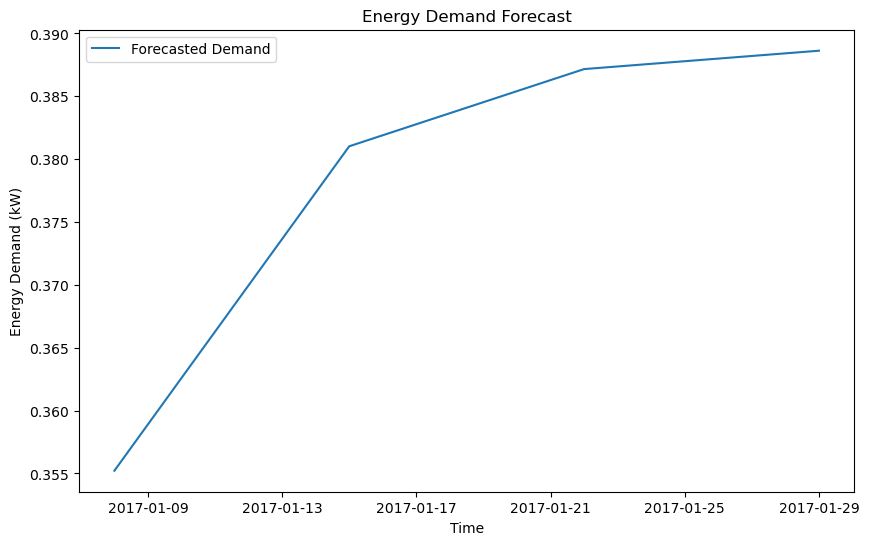

In [30]:
forecast = model_fit.forecast(steps=4)  # Example: Forecasting the next 4 weeks

# Optional: Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(forecast, label='Forecasted Demand')
plt.title('Energy Demand Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Demand (kW)')
plt.legend()
plt.show()